

# 6.1 Constraints on Rational Preferences



In [2]:
import random

# Định nghĩa hàm tiện ích cho các kết quả
utility = {
    "A": 10,  # Giá trị tiện ích của kết quả A
    "B": 7,   # Giá trị tiện ích của kết quả B
    "C": 5    # Giá trị tiện ích của kết quả C
}

# 1. Hoàn chỉnh
def check_completeness(result1, result2):
    """Kiểm tra tính hoàn chỉnh: Có thể so sánh hai kết quả."""
    if utility[result1] > utility[result2]:
        return f"{result1} ≻ {result2}"
    elif utility[result1] < utility[result2]:
        return f"{result2} ≻ {result1}"
    else:
        return f"{result1} ∼ {result2}"

# 2. Tính bắc cầu
def check_transitivity(result1, result2, result3):
    """Kiểm tra tính bắc cầu."""
    if utility[result1] >= utility[result2] and utility[result2] >= utility[result3]:
        if utility[result1] >= utility[result3]:
            return f"Tính bắc cầu thỏa mãn: {result1} ≽ {result2}, {result2} ≽ {result3} → {result1} ≽ {result3}"
    return f"Tính bắc cầu không thỏa mãn."

# 3. Liên tục
def check_continuity(result1, result2, result3, p):
    """Kiểm tra tính liên tục với xác suất p."""
    lottery_utility = p * utility[result1] + (1 - p) * utility[result3]
    if abs(lottery_utility - utility[result2]) < 1e-6:  # Kiểm tra xấp xỉ
        return f"Tính liên tục thỏa mãn với p = {p}: [{result1}: {p}; {result3}: {1-p}] ∼ {result2}"
    return f"Tính liên tục không thỏa mãn với p = {p}."

# 4. Độc lập
def check_independence(result1, result2, result3, p):
    """Kiểm tra tính độc lập."""
    lottery_1 = p * utility[result1] + (1 - p) * utility[result3]
    lottery_2 = p * utility[result2] + (1 - p) * utility[result3]
    if lottery_1 > lottery_2:
        return f"Tính độc lập thỏa mãn: [{result1}: {p}; {result3}: {1-p}] ≻ [{result2}: {p}; {result3}: {1-p}]"
    elif lottery_1 < lottery_2:
        return f"Tính độc lập không thỏa mãn: [{result2}: {p}; {result3}: {1-p}] ≻ [{result1}: {p}; {result3}: {1-p}]"
    else:
        return f"Tính độc lập thỏa mãn: [{result1}: {p}; {result3}: {1-p}] ∼ [{result2}: {p}; {result3}: {1-p}]"


In [3]:
print("1. Hoàn chỉnh:")
print(check_completeness("A", "B"))
print(check_completeness("B", "C"))
print()

1. Hoàn chỉnh:
A ≻ B
B ≻ C



In [4]:
print("2. Tính bắc cầu:")
print(check_transitivity("A", "B", "C"))
print()

2. Tính bắc cầu:
Tính bắc cầu thỏa mãn: A ≽ B, B ≽ C → A ≽ C



In [5]:
print("3. Liên tục:")
p = 0.4
print(check_continuity("A", "B", "C", p))
print()

3. Liên tục:
Tính liên tục thỏa mãn với p = 0.4: [A: 0.4; C: 0.6] ∼ B



In [6]:
print("4. Độc lập:")
p = 0.7
print(check_independence("A", "B", "C", p))

4. Độc lập:
Tính độc lập thỏa mãn: [A: 0.7; C: 0.30000000000000004] ≻ [B: 0.7; C: 0.30000000000000004]


# 6.2 Utility Functions

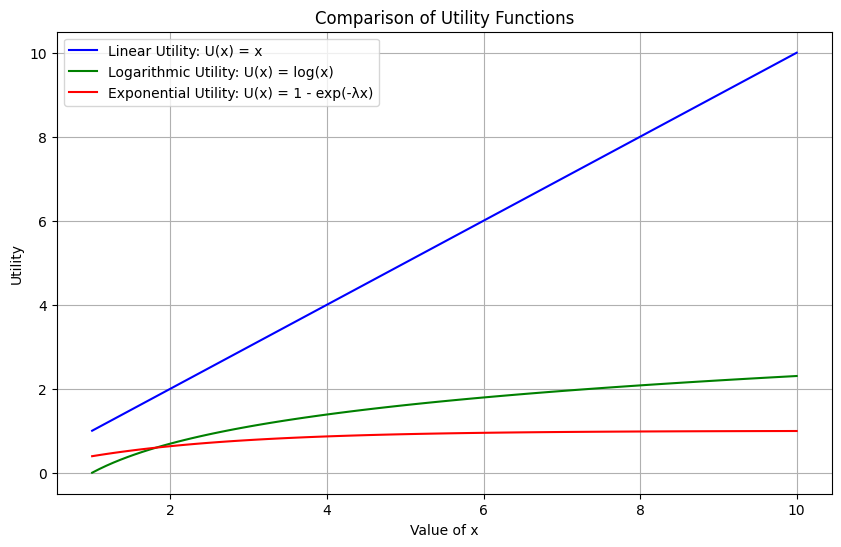

In [7]:
#6.2 Utility Functions
import numpy as np
import matplotlib.pyplot as plt

# 1. Utility Functions
def linear_utility(x):
    """Hàm tiện ích tuyến tính U(x) = x"""
    return x

def log_utility(x):
    """Hàm tiện ích logarit U(x) = log(x)"""
    return np.log(x)

def exp_utility(x, risk_aversion=0.5):
    """Hàm tiện ích mũ U(x) = 1 - exp(-λx)"""
    return 1 - np.exp(-risk_aversion * x)

# 2. Sample Data
x_values = np.linspace(1, 10, 100)  # Tập giá trị từ 1 đến 10

# Tính giá trị tiện ích theo từng hàm
linear_utilities = linear_utility(x_values)
log_utilities = log_utility(x_values)
exp_utilities = exp_utility(x_values)

# 3. Visualization
plt.figure(figsize=(10, 6))

# Biểu diễn hàm tuyến tính
plt.plot(x_values, linear_utilities, label="Linear Utility: U(x) = x", color="blue")

# Biểu diễn hàm logarit
plt.plot(x_values, log_utilities, label="Logarithmic Utility: U(x) = log(x)", color="green")

# Biểu diễn hàm mũ
plt.plot(x_values, exp_utilities, label="Exponential Utility: U(x) = 1 - exp(-λx)", color="red")

# Thêm thông tin biểu đồ
plt.title("Comparison of Utility Functions")
plt.xlabel("Value of x")
plt.ylabel("Utility")
plt.legend()
plt.grid()
plt.show()

In [8]:
#1. Phép biến đổi affine dương:
import numpy as np

# Phép biến đổi affine dương
def affine_transform(U, m, b):
    return m * np.array(U) + b

# Tiện ích ban đầu
utilities = [0.7, 0.4, 0.2]

# Tham số affine
m, b = 2, 0.5

# Tính tiện ích sau phép biến đổi
U_affine = affine_transform(utilities, m, b)

# Kết quả
print("Tiện ích ban đầu:", utilities)
print("Tiện ích sau phép biến đổi affine:", U_affine)

Tiện ích ban đầu: [0.7, 0.4, 0.2]
Tiện ích sau phép biến đổi affine: [1.9 1.3 0.9]


In [9]:
#2. Tiện ích của một xổ số
def lottery_utility(probabilities, utilities):
    return np.dot(probabilities, utilities)

# Dữ liệu xổ số
probabilities = [0.6, 0.3, 0.1]
utilities = [1, 0.5, 0]

# Tính tiện ích kỳ vọng
U_lottery = lottery_utility(probabilities, utilities)

# Kết quả
print("Tiện ích của xổ số:", U_lottery)

Tiện ích của xổ số: 0.75


In [10]:
#3. Hàm tiện ích chuẩn hóa
def normalize_utility(U, U_min, U_max):
    return (np.array(U) - U_min) / (U_max - U_min)

# Tiện ích ban đầu
utilities = [50, 30, 10]

# Tính tiện ích chuẩn hóa
U_min, U_max = min(utilities), max(utilities)
U_normalized = normalize_utility(utilities, U_min, U_max)

# Kết quả
print("Tiện ích ban đầu:", utilities)
print("Tiện ích chuẩn hóa:", U_normalized)

Tiện ích ban đầu: [50, 30, 10]
Tiện ích chuẩn hóa: [1.  0.5 0. ]


#6.3 Utility Elicitation

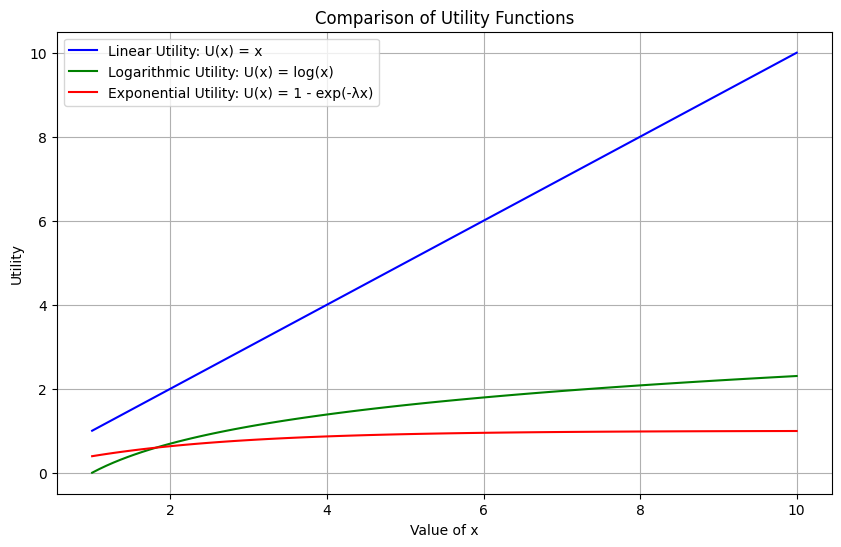

In [11]:

import numpy as np
import matplotlib.pyplot as plt

# 1. Utility Functions
def linear_utility(x):
    """Hàm tiện ích tuyến tính U(x) = x"""
    return x

def log_utility(x):
    """Hàm tiện ích logarit U(x) = log(x)"""
    return np.log(x)

def exp_utility(x, risk_aversion=0.5):
    """Hàm tiện ích mũ U(x) = 1 - exp(-λx)"""
    return 1 - np.exp(-risk_aversion * x)

# 2. Sample Data
x_values = np.linspace(1, 10, 100)  # Tập giá trị từ 1 đến 10

# Tính giá trị tiện ích theo từng hàm
linear_utilities = linear_utility(x_values)
log_utilities = log_utility(x_values)
exp_utilities = exp_utility(x_values)

# 3. Visualization
plt.figure(figsize=(10, 6))

# Biểu diễn hàm tuyến tính
plt.plot(x_values, linear_utilities, label="Linear Utility: U(x) = x", color="blue")

# Biểu diễn hàm logarit
plt.plot(x_values, log_utilities, label="Logarithmic Utility: U(x) = log(x)", color="green")

# Biểu diễn hàm mũ
plt.plot(x_values, exp_utilities, label="Exponential Utility: U(x) = 1 - exp(-λx)", color="red")

# Thêm thông tin biểu đồ
plt.title("Comparison of Utility Functions")
plt.xlabel("Value of x")
plt.ylabel("Utility")
plt.legend()
plt.grid()
plt.show()


In [12]:
#1. Hàm tiện ích bậc hai:
def quadratic_utility(x, lambd=3):
    return lambd * x - x**2

# Các giá trị x cần tính
x_values = [1, 2, 3]

# Tính tiện ích cho từng giá trị x
utilities = [quadratic_utility(x) for x in x_values]

# Xuất kết quả
for x, u in zip(x_values, utilities):
    print(f"U({x}) = {u}")

U(1) = 2
U(2) = 2
U(3) = 0


In [13]:
def exponential_utility(x, r=0.2):
    return 1 - np.exp(-r * x)

# Các giá trị x cần tính
x_values = [1, 2, 3]

# Tính tiện ích cho từng giá trị x
utilities = [exponential_utility(x) for x in x_values]

# Xuất kết quả
for x, u in zip(x_values, utilities):
    print(f"U({x}) = {u:.4f}")

U(1) = 0.1813
U(2) = 0.3297
U(3) = 0.4512


In [14]:
def power_utility(x, lambd=0.5):
    if lambd == 1:
        return np.log(x)  # Trường hợp đặc biệt
    return (x**(1 - lambd)) / (1 - lambd)

# Các giá trị x cần tính
x_values = [1, 2, 3]

# Tính tiện ích cho từng giá trị x
utilities = [power_utility(x) for x in x_values]

# Xuất kết quả
for x, u in zip(x_values, utilities):
    print(f"U({x}) = {u:.4f}")

U(1) = 2.0000
U(2) = 2.8284
U(3) = 3.4641


#6.4 Maximum Expected Utility Principle

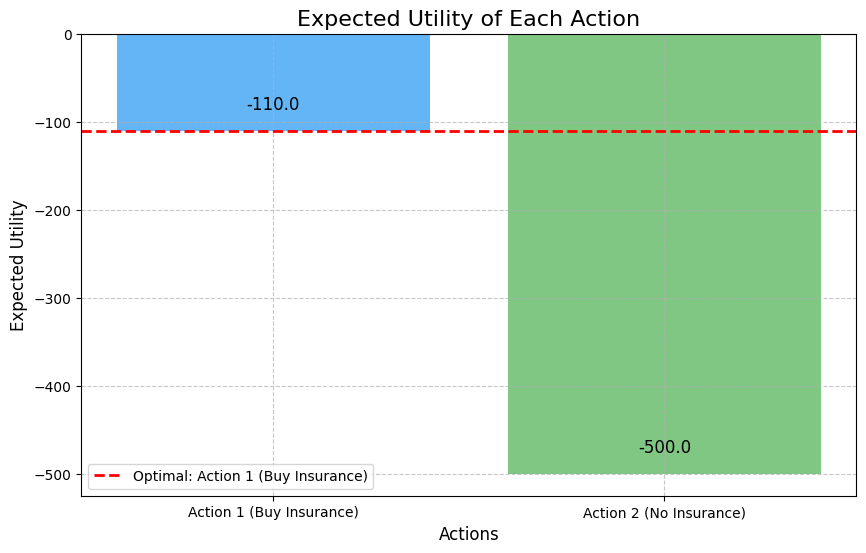

Expected Utilities: {'Action 1 (Buy Insurance)': -110.0, 'Action 2 (No Insurance)': -500.0}
Optimal Action: Action 1 (Buy Insurance)


In [15]:

import numpy as np
import matplotlib.pyplot as plt

# 1. Define Actions, States, Xác suất, Tiện ích
actions = ["Action 1 (Buy Insurance)", "Action 2 (No Insurance)"] #Mua bảo hiểm; Không mua bảo hiểm
states = ["State 1 (Accident)", "State 2 (No Accident)"] #Tai nạn; Không tai nạn

# Xác suất P(s|a): Xác suất trạng thái s xảy ra khi chọn hành động a
probabilities = {
    "Action 1 (Buy Insurance)": [0.1, 0.9],  # Xác suất tai nạn và không tai nạn khi mua bảo hiểm
    "Action 2 (No Insurance)": [0.1, 0.9]  # Xác suất tai nạn và không tai nạn khi không mua bảo hiểm
}

# Tiện ích U(s): Giá trị tiện ích của mỗi trạng thái
utilities = {
    "State 1 (Accident)": {"Action 1 (Buy Insurance)": -200, "Action 2 (No Insurance)": -5000},
    "State 2 (No Accident)": {"Action 1 (Buy Insurance)": -100, "Action 2 (No Insurance)": 0}
}

# 2. Tính toán tiện ích kỳ vọng cho từng hành động
def compute_expected_utility(action, probabilities, utilities):
    return sum(probabilities[action][i] * utilities[states[i]][action] for i in range(len(states)))

expected_utilities = {action: compute_expected_utility(action, probabilities, utilities) for action in actions}

# 3. Identify Hành động tối ưu
optimal_action = max(expected_utilities, key=expected_utilities.get)

# 4. Visualize
plt.figure(figsize=(10, 6))
colors = ['#64b5f6', '#81c784']
bars = plt.bar(expected_utilities.keys(), expected_utilities.values(), color=colors)
plt.title("Expected Utility of Each Action", fontsize=16)
plt.xlabel("Actions", fontsize=12)
plt.ylabel("Expected Utility", fontsize=12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=12)
plt.axhline(y=expected_utilities[optimal_action], color="red", linestyle="--", label=f"Optimal: {optimal_action}", linewidth=2)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Output results
#Tiện ích kỳ vọng
print("Expected Utilities:", expected_utilities)
#Hành động tối ưu
print("Optimal Action:", optimal_action)


#6.5 Decision Network

Expected Utilities: {'No Test': -80.0, 'Test': 94.0}
Optimal Action: Test


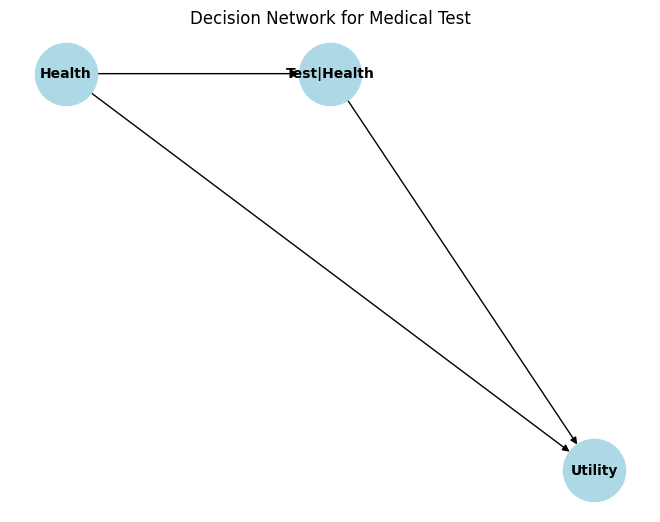

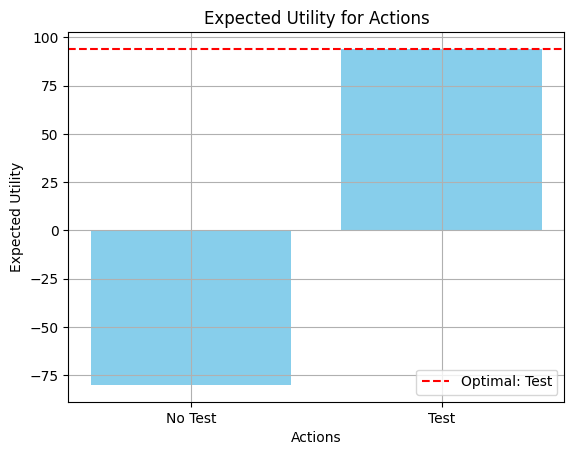

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1. Define the Decision Network
# Xác suất trạng thái sức khỏe
probabilities = {
    "Health": {"Healthy": 0.7, "Sick": 0.3},  # P(s1) = 0.7, P(s2) = 0.3
}

# Nút Tiện ích
utilities = {
    "Healthy": {"No Test": 100, "Test": 100},  # Khỏe mạnh
    "Sick": {"No Test": -500, "Test": 80},     # Bệnh nặng
}

# Nút quyết định
actions = ["No Test", "Test"] #Không xét nghiệm; Xét nghiệm

# 2. Calculate Expected Utility for Each Action
def compute_expected_utility(probabilities, utilities, action):
    expected_utility = 0
    for health, health_prob in probabilities["Health"].items():
        utility = utilities[health][action]
        expected_utility += health_prob * utility
    return expected_utility

# Tính lợi ích kỳ vọng (EU)
expected_utilities = {action: compute_expected_utility(probabilities, utilities, action) for action in actions}

# Hành động tối ưu
optimal_action = max(expected_utilities, key=expected_utilities.get)

# 3. Visualize Decision Network
def draw_decision_network():
    G = nx.DiGraph()
    G.add_edges_from([
        ("Health", "Test|Health"),
        ("Test|Health", "Utility"),
        ("Health", "Utility")
    ])
    pos = {
        "Health": (0, 1),
        "Test|Health": (1, 1),
        "Utility": (2, 0.5),
    }
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
    plt.title("Decision Network for Medical Test")
    plt.show()

# 4. Results
def visualize_results(expected_utilities, optimal_action):
    plt.bar(expected_utilities.keys(), expected_utilities.values(), color="skyblue")
    plt.axhline(y=expected_utilities[optimal_action], color="red", linestyle="--", label=f"Optimal: {optimal_action}")
    plt.title("Expected Utility for Actions")
    plt.xlabel("Actions")
    plt.ylabel("Expected Utility")
    plt.legend()
    plt.grid(True)
    plt.show()

# Résult
print("Expected Utilities:", expected_utilities)
print("Optimal Action:", optimal_action)

draw_decision_network()
visualize_results(expected_utilities, optimal_action)


#6.6 Value of Information (VOI)

In [17]:

#1. Xác định xác xuất và tiện ích
states = ["Sunny", "Rainy"] # Trạng thái hiện tại : nắng, mưa
probabilities = {"Sunny": 0.7, "Rainy": 0.3}  #Xác suất thời tiết nắng, mưa trước khi có bất kỳ thông tin nào.

utilities = {
    "Sunny": {"Umbrella": 8, "No Umbrella": 10},
    "Rainy": {"Umbrella": 7, "No Umbrella": -5},
}  #Tiện ích của mỗi hành động (Umbrella, No Umbrella) trong từng trạng thái (Sunny, Rainy)

forecast_probabilities = {
    "Sunny": {"Forecast: Sunny": 0.9, "Forecast: Rainy": 0.1},
    "Rainy": {"Forecast: Sunny": 0.2, "Forecast: Rainy": 0.8},
} # Xác suất điều kiện cho dự báo

#2. Tính toán với EU_no info (Tiện ích kỳ vọng khi chưa có thông tin)
def eu_without_info(probabilities, utilities):
    actions = ["Umbrella", "No Umbrella"] # danh sách các hành động có thể thực hiện
    expected_utilities = {} # lưu trữ tiện ích kỳ vọng của từng hành động
    for action in actions:  # Duyệt qua từng hành động
        eu = sum(probabilities[state] * utilities[state][action] for state in states) # tính tiện ích của mỗi kì vọng
        expected_utilities[action] = eu # lưu tiện ích kỳ vọng của từng hành động vào expected_utilities
    optimal_action = max(expected_utilities, key=expected_utilities.get) # tìm hành động tối ưu nhất
    return max(expected_utilities.values()), optimal_action  # trả về kỳ vọng cao nhất và hành động tối ưu nhất

eu_no_info, optimal_action_no_info = eu_without_info(probabilities, utilities) # chạy hàm

#3. Tính toán với EU_info (Tiện ích kỳ vọng khi có thông tin)
def eu_with_info(probabilities, forecast_probabilities, utilities):
    eu_with_info = 0  # biến lưu tiện ích kỳ vọng
    for forecast in ["Forecast: Sunny", "Forecast: Rainy"]:
        posterior_prob = {}
        total_prob = sum(
 probabilities[state] * forecast_probabilities[state][forecast] for state in states
        ) # Tính tổng xác suất dự báo dựa trên xác suất ban đầu và xác suất điều kiện
        for state in states:
            posterior_prob[state] = (
                probabilities[state] * forecast_probabilities[state][forecast]
            ) / total_prob #Sử dụng Định lý Bayes để cập nhật xác suất trạng thái
        expected_utilities = {}
        # Tính tiện ích kỳ vọng cho mỗi hành động
        actions = ["Umbrella", "No Umbrella"]

        for action in actions:

            eu = sum(posterior_prob[state] * utilities[state][action] for state in states)
            expected_utilities[action] = eu
        eu_with_info += total_prob * max(expected_utilities.values()) #chọn hành động tối ưu và cộng tiện ích kỳ vọng
    return eu_with_info    #Tiện ích kỳ vọng tối ưu khi có thêm thông tin

eu_info = eu_with_info(probabilities, forecast_probabilities, utilities) # chạy hàm

#4. Tính VOI (Giá trị thông tin)
voi = eu_info - eu_no_info

#5. Kết quả
print(f"EU_no_info(Tiện ích kỳ vọng khi chưa có thông tin): {eu_no_info} (Lựa chọn tối ưu nhất: {optimal_action_no_info})")
print(f"EU_info(Tiện ích kỳ vọng khi có thông tin): {eu_info}")
print(f"Giá trị thông tin (VOI): {voi}")

EU_no_info(Tiện ích kỳ vọng khi chưa có thông tin): 7.699999999999999 (Lựa chọn tối ưu nhất: Umbrella)
EU_info(Tiện ích kỳ vọng khi có thông tin): 8.239999999999998
Giá trị thông tin (VOI): 0.5399999999999991


#6.7 Irrationality

In [18]:


# Ta định nghĩa tiện ích của mất mát (mất càng lớn, tiện ích càng nhỏ)
def utility(loss):
    return -loss  # Hàm tuyến tính cho đơn giản
# Các tùy chọn trong 2 trường hợp
options = {
    'A': {'probability': 1.0, 'loss': 75},  # Chắc chắn mất 75 người
    'B': {'probability': 0.8, 'loss': 100}, # 80% mất 100 người, 20% không mất
    'C': {'probability': 0.1, 'loss': 75},  # 10% mất 75 người
    'D': {'probability': 0.08, 'loss': 100} # 8% mất 100 người
}

# Tính giá trị kỳ vọng
def calculate_expected_value(option):
    return option['probability'] *(utility(option['loss']))

# Trường hợp 1 và 2
print("Giá trị kỳ vọng cho trường hợp 1:")
for option in ['A', 'B']:
    ev = calculate_expected_value(options[option])
    print(f"Lựa chọn {option}: EV = {ev:.2f}")

print("\nGiá trị kỳ vọng cho trường hợp 2:")
for option in ['C', 'D']:
    ev = calculate_expected_value(options[option])
    print(f"Lựa chọn {option}: EV = {ev:.2f}")

# Mô phỏng lựa chọn của người (phi lý trí)
choices_human = {
    'Trường hợp 1': 'B',  # mọi người người chọn B vì họ muốn tránh sự chắc chắn về tổn thất
    'Trường hợp 2': 'C'   # mọi người người chọn C vì điều này hợp lý với lý thuyết tối ưu.
}

print("\nLựa chọn:")
for case, choice in choices_human.items():
    print(f"{case}: Người chọn {choice}")


Giá trị kỳ vọng cho trường hợp 1:
Lựa chọn A: EV = -75.00
Lựa chọn B: EV = -80.00

Giá trị kỳ vọng cho trường hợp 2:
Lựa chọn C: EV = -7.50
Lựa chọn D: EV = -8.00

Lựa chọn:
Trường hợp 1: Người chọn B
Trường hợp 2: Người chọn C
